<div style="text-align: center; background-color:#76B900; padding: 30px; border-radius: 15px;">
  <h1 style="color: white; font-weight: bold; font-size: 28px;">Llama-3.1-Nemotron-Nano-VL-8B-V1: Testing the Performance of Document Parsing Across Diverse Examples</h1>
</div>


The **Llama-3.1-Nemotron-Nano-VL-8B-V1** model, developed by NVIDIA, is a state-of-the-art solution for testing the performance of document parsing across various real-world examples. It has been designed to efficiently handle complex document parsing tasks with exceptional accuracy. This model is powered by the advanced capabilities of **Nemotron**, offering a highly scalable framework for processing and analyzing large volumes of document data. You can explore its impressive features and performance on the [Hugging Face model page](https://huggingface.co/nvidia/Llama-3.1-Nemotron-Nano-VL-8B-V1).

In [1]:
%%capture
! pip install markdown2
! pip install lxml
! pip install transformers accelerate timm einops open-clip-torch

# **1. Import Libraries**

In [17]:
from PIL import Image
from transformers import AutoImageProcessor, AutoModel, AutoTokenizer
from IPython.display import display, HTML
import base64
from io import BytesIO, StringIO

import warnings
import pandas as pd

from pdf2image import convert_from_path

import re

# **2. Load Llama-3.1-Nemotron-Nano-VL-8B-V1**

In [5]:
path = "nvidia/Llama-3.1-Nemotron-Nano-VL-8B-V1"
model = AutoModel.from_pretrained(path, trust_remote_code=True, device_map="cuda").eval()
tokenizer = AutoTokenizer.from_pretrained(path)
image_processor = AutoImageProcessor.from_pretrained(path, trust_remote_code=True, device="cuda")

config.json:   0%|          | 0.00/7.65k [00:00<?, ?B/s]

configuration.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/Llama-3.1-Nemotron-Nano-VL-8B-V1:
- configuration.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


hf_model.py: 0.00B [00:00, ?B/s]

input_conditioner.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- input_conditioner.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


enable_spectral_reparam.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- enable_spectral_reparam.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


vitdet.py: 0.00B [00:00, ?B/s]

extra_models.py: 0.00B [00:00, ?B/s]

forward_intermediates.py: 0.00B [00:00, ?B/s]

feature_normalizer.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- feature_normalizer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- forward_intermediates.py
- feature_normalizer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- extra_models.py
- forward_intermediates.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- vitdet.py
- extra_models.py


extra_timm_models.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- extra_timm_models.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


vit_patch_generator.py: 0.00B [00:00, ?B/s]

cls_token.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- cls_token.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- vit_patch_generator.py
- cls_token.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


enable_cpe_support.py: 0.00B [00:00, ?B/s]

dual_hybrid_vit.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- dual_hybrid_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- enable_cpe_support.py
- dual_hybrid_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


open_clip_adaptor.py: 0.00B [00:00, ?B/s]

adaptor_registry.py: 0.00B [00:00, ?B/s]

adaptor_generic.py: 0.00B [00:00, ?B/s]

adaptor_base.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- adaptor_base.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


adaptor_mlp.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- adaptor_mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- adaptor_generic.py
- adaptor_base.py
- adaptor_mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- adaptor_registry.py
- adaptor_generic.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- open_clip_adaptor.py
- adaptor_r

common.py: 0.00B [00:00, ?B/s]

radio_model.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- radio_model.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- common.py
- radio_model.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


dinov2_arch.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- dinov2_arch.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


eradio_model.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- eradio_model.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/nvidia/C-RADIOv2-H:
- hf_model.py
- input_conditioner.py
- enable_spectral_reparam.py
- vitdet.py
- extra_timm_models.py
- vit_patch_generator.py
- enable_cpe_support.py
- open_clip_adaptor.py
- common.py
- dinov2_arch.py
- eradio_model.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import

modeling.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/Llama-3.1-Nemotron-Nano-VL-8B-V1:
- modeling.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/17.4G [00:00<?, ?B/s]

No pretrained configuration specified for vit_huge_patch16_224 model. Using a default. Please add a config to the model pretrained_cfg registry or pass explicitly.
Some weights of Llama_Nemotron_Nano_VL were not initialized from the model checkpoint at nvidia/Llama-3.1-Nemotron-Nano-VL-8B-V1 and are newly initialized: ['vision_model.radio_model.summary_idxs']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/52.9k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/283 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


image_processing.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/Llama-3.1-Nemotron-Nano-VL-8B-V1:
- image_processing.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


# **3. Define the Prompt**

In [20]:
EXTRACT_PROMPT = (
    "Below is the image of one page of a document. "
    "Just return the plain text representation of this document as if you were reading it naturally.\n"
    "ALL tables and content should be presented in Markdown format.\n"
    'If there are images or figures in the page, present them in table format.\n'
    "Do not hallucinate.\n"
)

# **4. Inference**

In [21]:
def ocr_page(image_path):
    image = Image.open(image_path)

    image_features = image_processor(image)

    generation_config = dict(max_new_tokens=1024, do_sample=False, eos_token_id=tokenizer.eos_token_id)

    response = model.chat(
        tokenizer=tokenizer, question=EXTRACT_PROMPT, generation_config=generation_config,
        **image_features)
    
    return response

In [30]:
def display_text_with_pdf_or_image_plain(raw_text, file_path, pdf_page=0, max_width=800):
    warnings.filterwarnings('ignore', category=FutureWarning)
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    
    # --- Image/PDF Display Part ---
    if file_path.lower().endswith(".pdf"):
        images = convert_from_path(file_path, first_page=pdf_page+1, last_page=pdf_page+1)
        img = images[0].convert("RGB")
    else:
        img = Image.open(file_path).convert("RGB")
    
    w_percent = max_width / float(img.width)
    new_height = int(float(img.height) * w_percent)
    img = img.resize((max_width, new_height), Image.LANCZOS)
    
    buffer = BytesIO()
    img.save(buffer, format="JPEG", quality=70)
    img_data = base64.b64encode(buffer.getvalue()).decode()
    html = f"""
    <div style="text-align: center;">
        <img src="data:image/jpeg;base64,{img_data}" style="width: 100%; border: 1px solid #ccc;" />
    </div>
    """
    display(HTML(html))
    # --- Markdown as plain text + tables as DataFrames ---
    html_tables = list(re.finditer(r'(<table[\s\S]*?</table>)', raw_text, re.IGNORECASE))
    last_end = 0
    for match in html_tables:
        text_before = raw_text[last_end:match.start()]
        if text_before.strip():
            print(text_before.strip())
            print('-' * 40)
        table_html = match.group(1)
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", FutureWarning)
                warnings.simplefilter("ignore", RuntimeWarning)
                df_list = pd.read_html(StringIO(table_html))
                for df in df_list:
                    df = df.fillna("")
                    df.columns = df.iloc[0]
                    df = df[1:].reset_index(drop=True)
                    display(df)
        except Exception as e:
            print("Error parsing HTML table:", e)
        last_end = match.end()
    # Print any remaining text after the last table
    if last_end < len(raw_text):
        text_after = raw_text[last_end:].strip()
        if text_after:
            print(text_after)

## **Example n°1**

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.



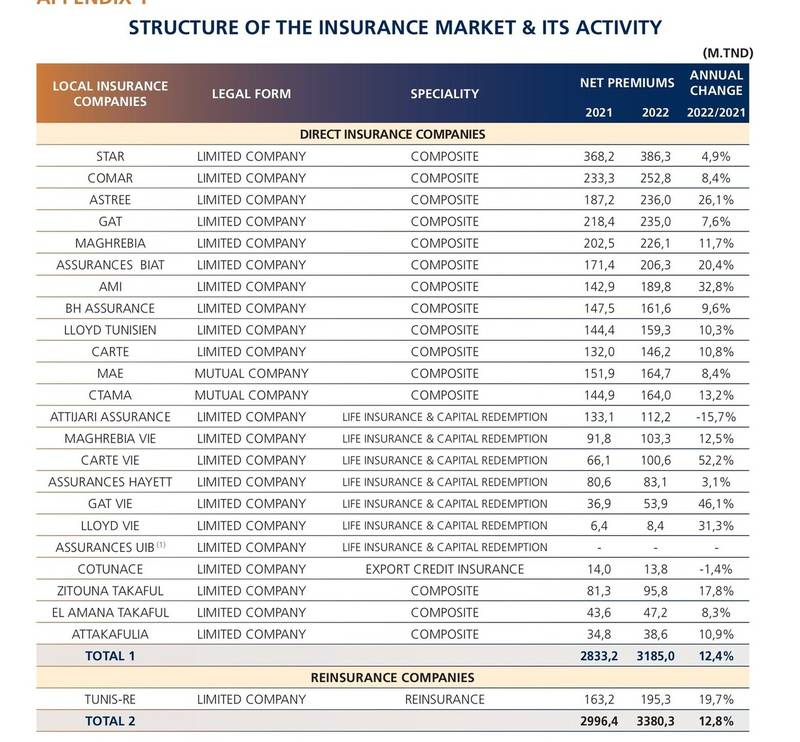

## APPENDIX I

## STRUCTURE OF THE INSURANCE MARKET & ITS ACTIVITY

(M.TND)

\begin{tabular}{cccccc}
**LOCAL INSURANCE COMPANIES** & **LEGAL FORM** & **SPECIALITY** & \multicolumn{2}{c}{**NET PREMIUMS**} & **ANNUAL CHANGE**\\
 &  &  & **2021** & **2022** & **2022/2021**\\
\multicolumn{6}{c}{**DIRECT INSURANCE COMPANIES**}\\
STAR & LIMITED COMPANY & COMPOSITE & 368,2 & 386,3 & 4,9\%\\
COMAR & LIMITED COMPANY & COMPOSITE & 233,3 & 252,8 & 8,4\%\\
ASTREE & LIMITED COMPANY & COMPOSITE & 187,2 & 236,0 & 26,1\%\\
GAT & LIMITED COMPANY & COMPOSITE & 218,4 & 235,0 & 7,6\%\\
MAGHREBIA & LIMITED COMPANY & COMPOSITE & 202,5 & 226,1 & 11,7\%\\
ASSURANCES BIAT & LIMITED COMPANY & COMPOSITE & 171,4 & 206,3 & 20,4\%\\
AMI & LIMITED COMPANY & COMPOSITE & 142,9 & 189,8 & 32,8\%\\
BH ASSURANCE & LIMITED COMPANY & COMPOSITE & 147,5 & 161,6 & 9,6\%\\
LLOYD TUNISIEN & LIMITED COMPANY & COMPOSITE & 144,4 & 159,3 & 10,3\%\\
CARTE & LIMITED COMPANY & COMPOSITE & 132,0 & 146,2 & 10,8\%\\
MAE & MUTUAL COMPANY &

In [34]:
%%time

image_path = "cga_images/RAP_CGA_FR_ANG_2022-images-79 (1) (1).jpg"
result = ocr_page(image_path)
display_text_with_pdf_or_image_plain(
    raw_text=result, file_path=image_path
)

## **Example n°2**

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.



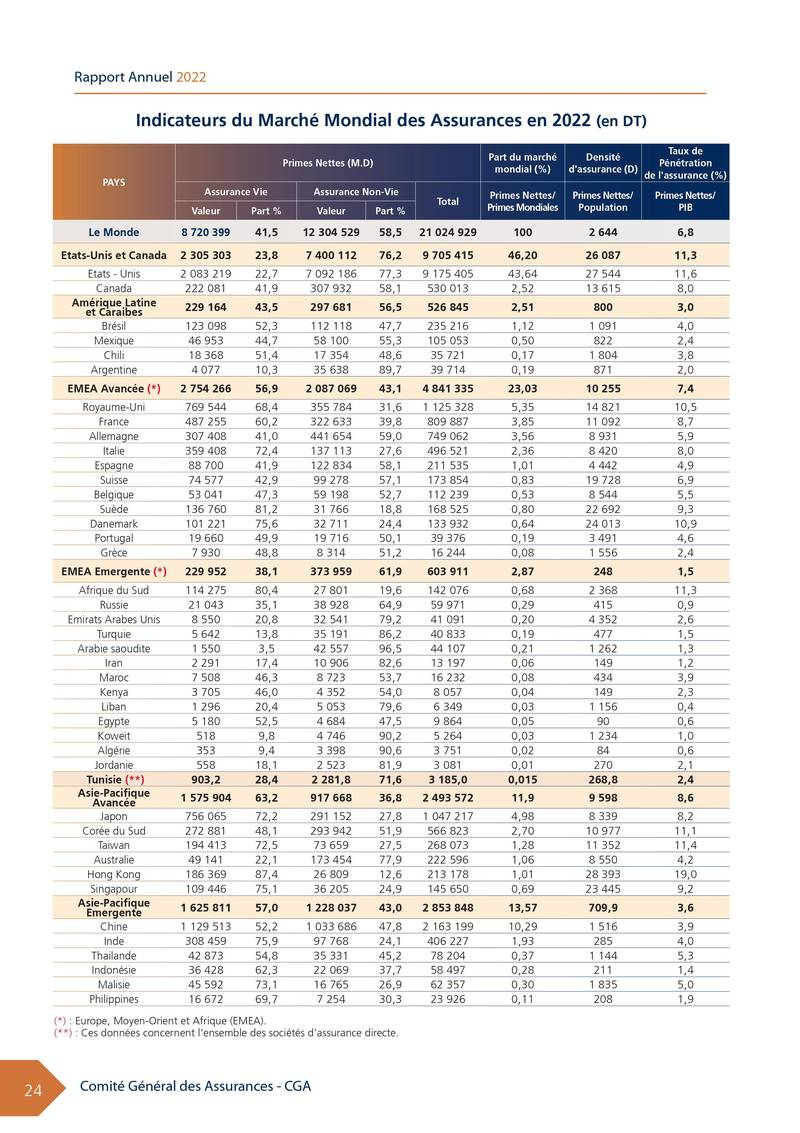

Rapport Annuel 2022

Indicateurs du Marché Mondial des Assurances en 2022 (en DT)

(*) : Europe, Moyen-Orient et Afrique (EMEA).

(**) : Ces données concernent l’ensemble des sociétés d’assurance directe.

24
Comité Général des Assurances - CGA

| Pays | \multicolumn{5}{c}{Primes Nettes (M.D)} | Part du marché mondial (%) | Densité d'assurance (D) | Taux de Pénétration de l'assurance (%) |
| --- | Assurance Vie Valeur | Part % | Assurance Non-Vie Valeur | Part % | Total | Primes Nettes/ Primes Mondiales | Primes Nettes/ Population | Primes Nettes/ PIB |
| Le Monde | 8 720 399 | 41,5 | 12 304 529 | 58,5 | 21 024 929 | 100 | 2 644 | 6,8 |
| Etats-Unis et Canada | 2 305 303 | 23,8 | 7 400 112 | 76,2 | 9 705 415 | 46,20 | 26 087 | 11,3 |
| Etats - Unis | 2 083 219 | 22,7 | 7 092 186 | 77,3 | 9 175 405 | 43,64 | 27 544 | 11,6 |
| Canada | 222 081 | 41,9 | 307 932 | 58,1 | 530 013 | 2,52 | 13 615 | 8,0 |
| Amérique Latine et Caraïbes | 229 164 | 43,5 | 297 681 | 56,5 | 526 845 | 2,51 | 800 |

In [35]:
%%time

image_path = "Different_Tables_Images_Testing/other_table.jpg"
result = ocr_page(image_path)
display_text_with_pdf_or_image_plain(
    raw_text=result, file_path=image_path
)

## **Example n°3**

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.



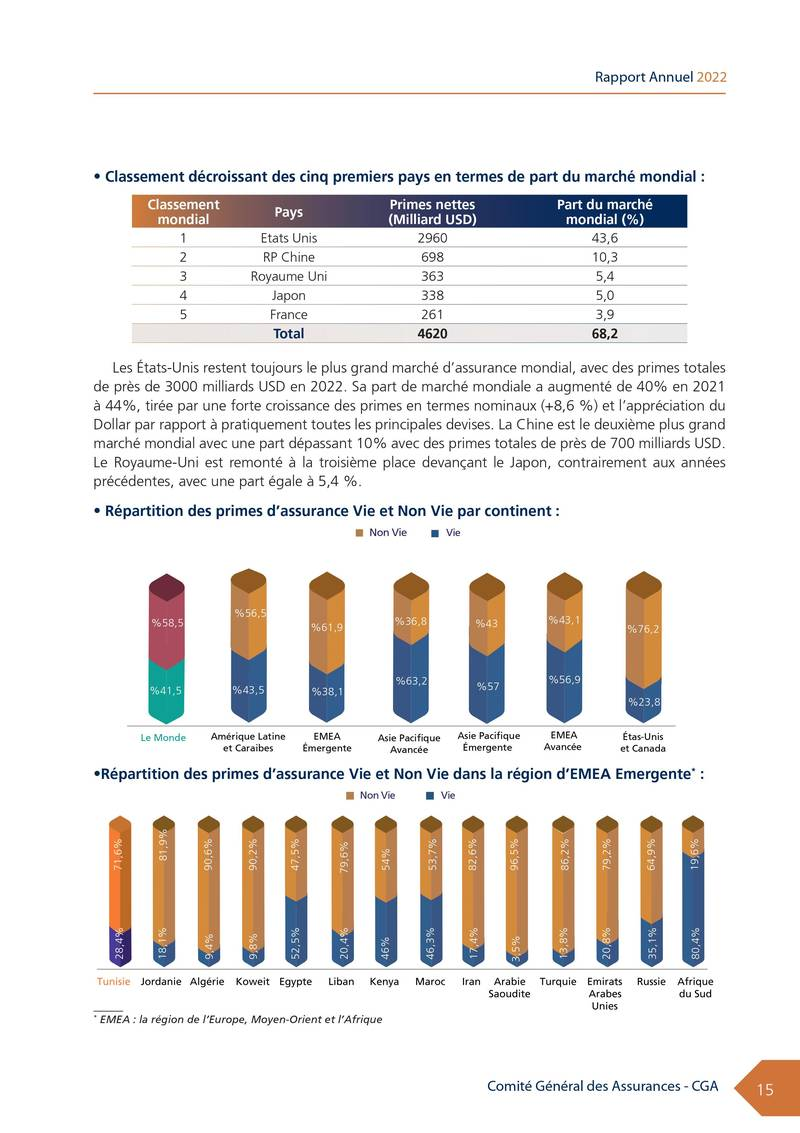

Rapport Annuel 2022

• Classement décroissant des cinq premiers pays en termes de part du marché mondial :

Les États-Unis restent toujours le plus grand marché d’assurance mondial, avec des primes totales de près de 3000 milliards USD en 2022. Sa part de marché mondiale a augmenté de 40% en 2021 à 44%, tirée par une forte croissance des primes en termes nominaux (+8,6 %) et l’appréciation du Dollar par rapport à pratiquement toutes les principales devises. La Chine est le deuxième plus grand marché mondial avec une part dépassant 10% avec des primes totales de près de 700 milliards USD. Le Royaume-Uni est remonté à la troisième place devant le Japon, contrairement aux années précédentes, avec une part égale à 5,4 %.

• Répartition des primes d’assurance Vie et Non Vie par continent :

• Répartition des primes d’assurance Vie et Non Vie dans la région d’EMEA Emergente* :

15
Comité Général des Assurances - CGA

| Classement mondial | Pays | Primes nettes (Milliard USD) | Part du marché

In [36]:
%%time

image_path = "cga_images/RAP_CGA_FR_ANG_2022-images-15.jpg"
result = ocr_page(image_path)
display_text_with_pdf_or_image_plain(
    raw_text=result, file_path=image_path
)

## **Example n°4**

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.



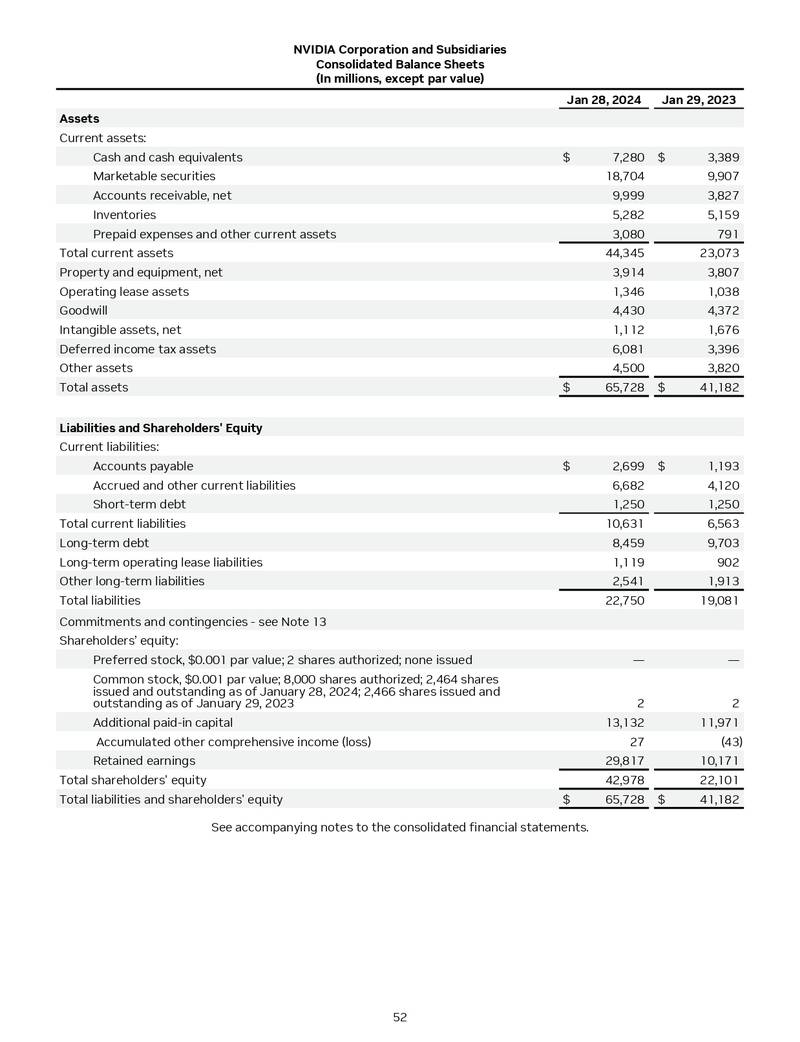

NVIDIA Corporation and Subsidiaries Consolidated Balance Sheets (In millions, except par value)

See accompanying notes to the consolidated financial statements.

52

\begin{tabular}{ccc}
 & Jan 28, 2024 & Jan 29, 2023\\
\multicolumn{3}{c}{Assets}\\
\multicolumn{3}{c}{Current assets:}\\
Cash and cash equivalents & $ 7,280 & $ 3,389\\
Marketable securities & 18,704 & 9,907\\
Accounts receivable, net & 9,999 & 3,827\\
Inventories & 5,282 & 5,159\\
Prepaid expenses and other current assets & 3,080 & 791\\
Total current assets & 44,345 & 23,073\\
Property and equipment, net & 3,914 & 3,807\\
Operating lease assets & 1,346 & 1,038\\
Goodwill & 4,430 & 4,372\\
Intangible assets, net & 1,112 & 1,676\\
Deferred income tax assets & 6,081 & 3,396\\
Other assets & 4,500 & 3,820\\
Total assets & $ 65,728 & $ 41,182\\
\multicolumn{3}{c}{Liabilities and Shareholders' Equity}\\
\multicolumn{3}{c}{Current liabilities:}\\
Accounts payable & $ 2,699 & $ 1,193\\
Accrued and other current liabilities & 6,

In [37]:
%%time

image_path = "Different_Tables_Images_Testing/NVIDIA_Report_Removed_Pages-1-16-14_page-0001.jpg"
result = ocr_page(image_path)
display_text_with_pdf_or_image_plain(
    raw_text=result, file_path=image_path
)

## **Example n°5**

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.



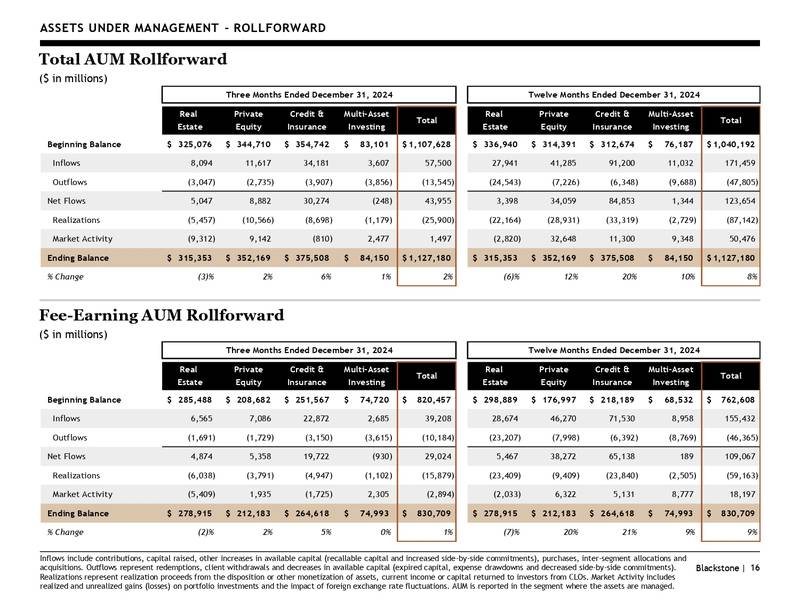

ASSETS UNDER MANAGEMENT - ROLLFORWARD

Total AUM Rollforward

($ in millions)

Fee-Earning AUM Rollforward

($ in millions)

Inflows include contributions, capital raised, other increases in available capital (recallable capital and increased side-by-side commitments), purchases, inter-segment allocations and acquisitions. Outflows represent redemptions, client withdrawals and decreases in available capital (expired capital, expense drawdowns and decreased side-by-side commitments). Realizations represent realization proceeds from the disposition or other monetization of assets, current income or capital returned to investors from CLOs. Market Activity includes realized and unrealized gains (losses) on portfolio investments and the impact of foreign exchange rate fluctuations. AUM is reported in the segment where the assets are managed.

Blackstone | 16

\begin{tabular}{ccccccc}
\multicolumn{7}{c}{Three Months Ended December 31, 2024} \\
 & Real Estate & Private Equity & Credit \& Insu

In [44]:
%%time

image_path = "pdf_files_pages/Blackstone4Q24EarningsPressRelease_page-0020.jpg"
result = ocr_page(image_path)
display_text_with_pdf_or_image_plain(
    raw_text=result, file_path=image_path
)

## **Example n°6**

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.



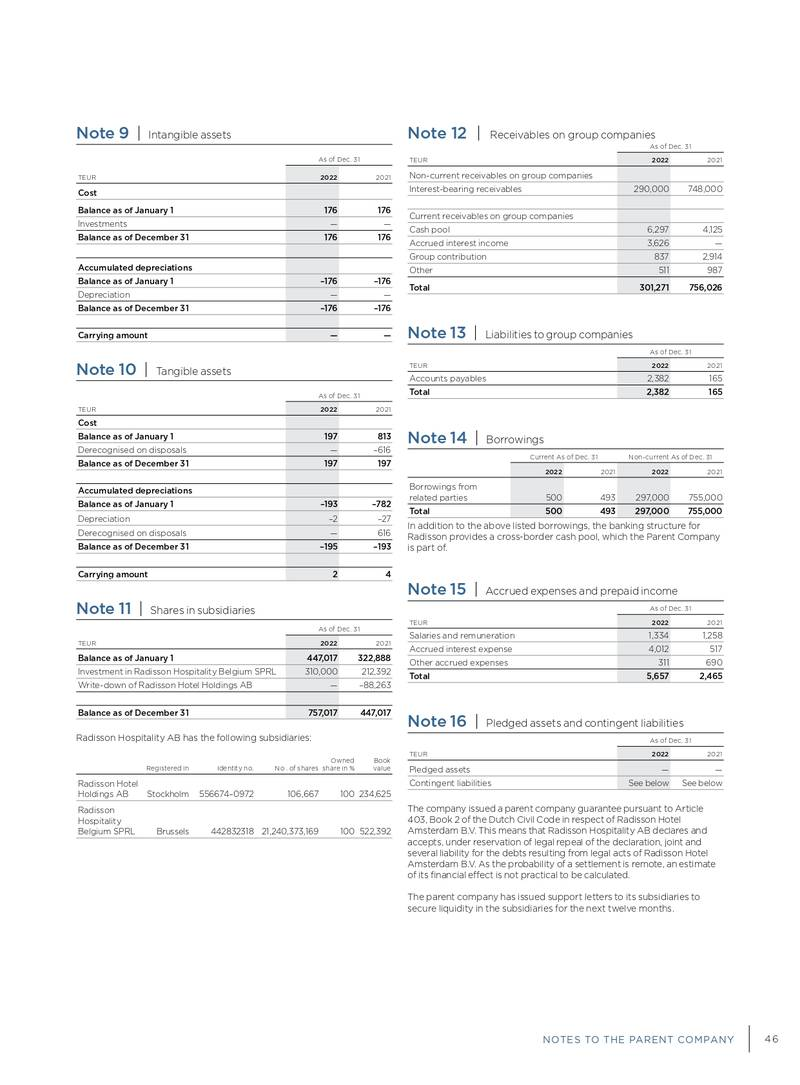

## Note 9 | Intangible assets

## Note 10 | Tangible assets

## Note 11 | Shares in subsidiaries

Radisson Hospitality AB has the following subsidiaries:

## Note 12 | Receivables on group companies

## Note 13 | Liabilities to group companies

## Note 14 | Borrowings

In addition to the above listed borrowings, the banking structure for Radisson provides a cross-border cash pool, which the Parent Company is part of.

## Note 15 | Accrued expenses and prepaid income

## Note 16 | Pledged assets and contingent liabilities

The company issued a parent company guarantee pursuant to Article 4.03, Book 2 of the Dutch Civil Code in respect of Radisson Hotel Amsterdam B.V. This means that Radisson Hospitality AB declares and accepts, under reservation of legal repeal of the declaration, joint and several liability for the debts resulting from legal acts of Radisson Hotel Amsterdam B.V. As the probability of a settlement is remote, an estimate of its financial effect is not practical to be cal

In [39]:
%%time

image_path = "pdf_files_pages/RHG_annual_report_2022_page-0047.jpg"
result = ocr_page(image_path)
display_text_with_pdf_or_image_plain(
    raw_text=result, file_path=image_path
)

## **Example n°7**

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.



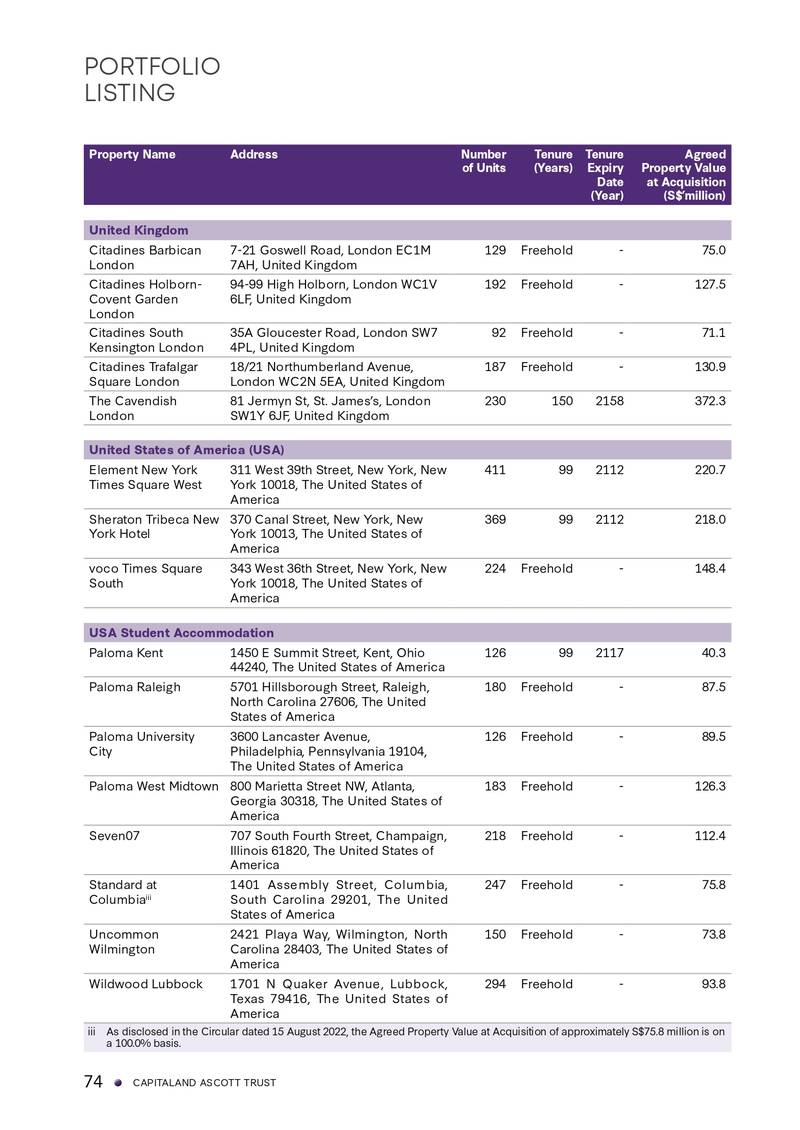

PORTFOLIO LISTING

iii As disclosed in the Circular dated 15 August 2022, the Agreed Property Value at Acquisition of approximately S$75.8 million is on a 100.0% basis.

74 CAPITALAND ASCOTT TRUST

\begin{tabular}{ccccccc}
**Property Name** & **Address** & **Number of Units** & **Tenure (Years)** & **Tenure Expiry Date (Year)** & **Agreed Property Value at Acquisition (S$’million)** & \\
\multicolumn{7}{c}{United Kingdom}\\
Citadines Barbican London & 7-21 Goswell Road, London EC1M 7AH, United Kingdom & 129 & Freehold & - & 75.0 & \\
Citadines Holborn- Covent Garden London & 94-99 High Holborn, London WC1V 6LF, United Kingdom & 192 & Freehold & - & 127.5 & \\
Citadines South Kensington London & 35A Gloucester Road, London SW7 4PL, United Kingdom & 92 & Freehold & - & 71.1 & \\
Citadines Trafalgar Square London & 18/21 Northumberland Avenue, London WC2N 5EA, United Kingdom & 187 & Freehold & - & 130.9 & \\
The Cavendish London & 81 Jeremyn St, St. James’s, London SW1Y 6JF, United Kingdo

In [40]:
%%time

image_path = "pdf_files_pages/CLAS-FY2023-AR_page-0076.jpg"
result = ocr_page(image_path)
display_text_with_pdf_or_image_plain(
    raw_text=result, file_path=image_path
)

## **Example n°8**

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.



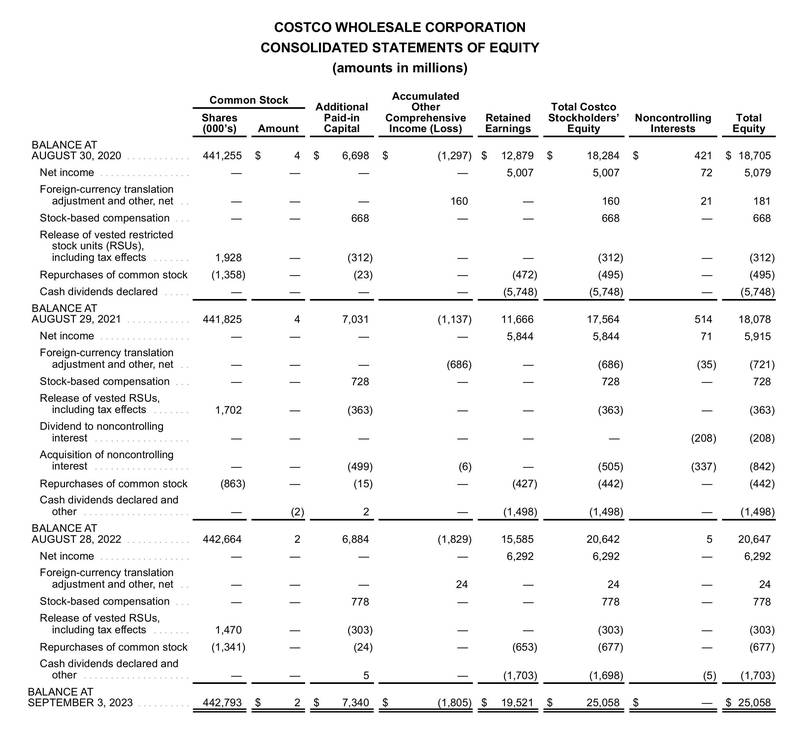

COSTCO WHOLESALE CORPORATION CONSOLIDATED STATEMENTS OF EQUITY (amounts in millions)

\begin{tabular}{ccccccccc}
 & Common Stock Shares (000's) & Amount & Additional Paid-in Capital & Accumulated Other Comprehensive Income (Loss) & Retained Earnings & Total Costco Stockholders' Equity & Noncontrolling Interests & Total Equity \\
BALANCE AT AUGUST 30, 2020 & 441,255 & $ 4 & $ 6,698 & $ (1,297) & $ 12,879 & $ 18,284 & $ 421 & $ 18,705 \\
Net income & — & — & — & — & 5,007 & 5,007 & 72 & 5,079 \\
Foreign-currency translation adjustment and other, net & — & — & — & 160 & — & 160 & 21 & 181 \\
Stock-based compensation & — & — & 668 & — & — & 668 & — & 668 \\
Release of vested restricted stock units (RSUs), including tax effects & 1,928 & — & (312) & — & — & (312) & — & (312) \\
Repurchases of common stock & (1,358) & — & (23) & — & (472) & (495) & — & (495) \\
Cash dividends declared & — & — & — & — & (5,748) & (5,748) & — & (5,748) \\
BALANCE AT AUGUST 29, 2021 & 441,825 & 4 & 7,031 & (1,1

In [41]:
%%time

image_path = "Different_Tables_Images_Testing/table_3.jpg"
result = ocr_page(image_path)
display_text_with_pdf_or_image_plain(
    raw_text=result, file_path=image_path
)

## **Example n°9**

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.



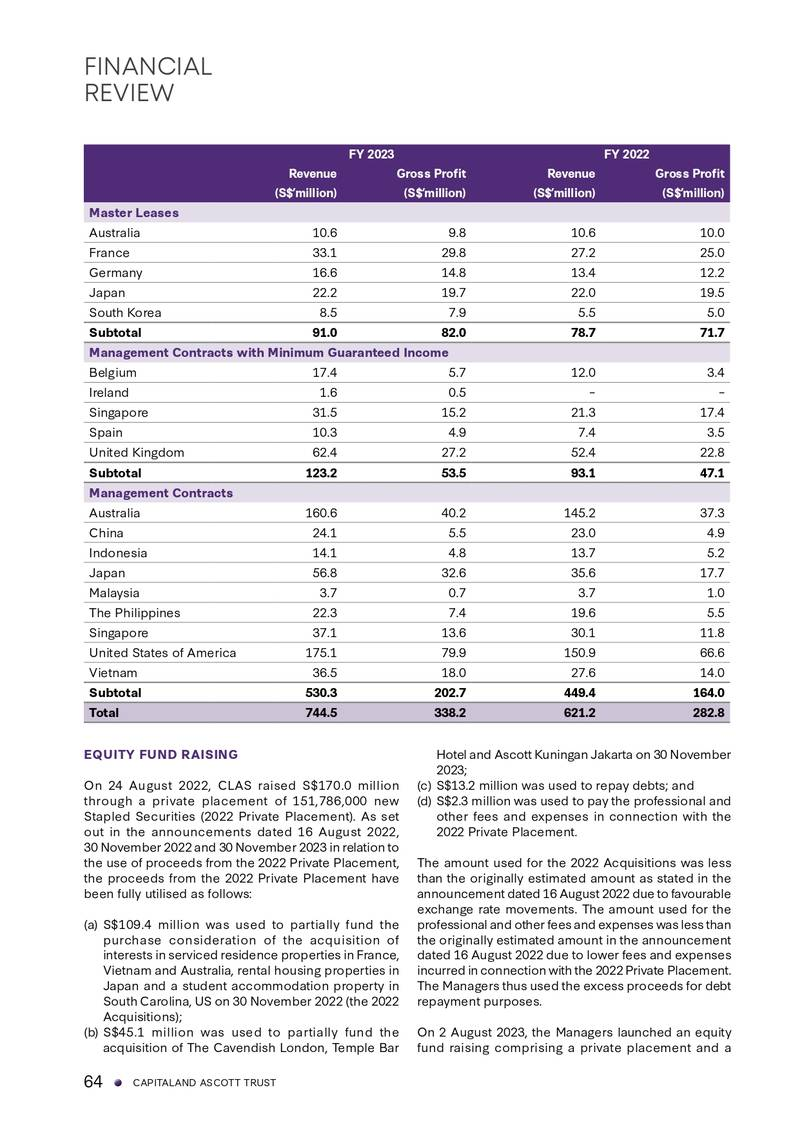

FINANCIAL REVIEW

EQUITY FUND RAISING

On 24 August 2022, CLAS raised S$170.0 million through a private placement of 151,786,000 new Stapled Securities (2022 Private Placement). As set out in the announcements dated 16 August 2022, 30 November 2022 and 30 November 2023 in relation to the use of proceeds from the 2022 Private Placement, the proceeds from the 2022 Private Placement have been fully utilised as follows:

(a) S$109.4 million was used to partially fund the purchase consideration of the acquisition of interests in serviced residence properties in France, Vietnam and Australia, rental housing properties in Japan and a student accommodation property in South Carolina, US on 30 November 2022 (the 2022 Acquisitions);

(b) S$45.1 million was used to partially fund the acquisition of The Cavendish London, Temple Bar

Hotel and Ascott Kuningan Jakarta on 30 November 2023;

(c) S$13.2 million was used to repay debts; and

(d) S$2.3 million was used to pay the professional and other f

In [42]:
%%time

image_path = "pdf_files_pages/CLAS-FY2023-AR_page-0066.jpg"
result = ocr_page(image_path)
display_text_with_pdf_or_image_plain(
    raw_text=result, file_path=image_path
)

## **Example n°10**

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.



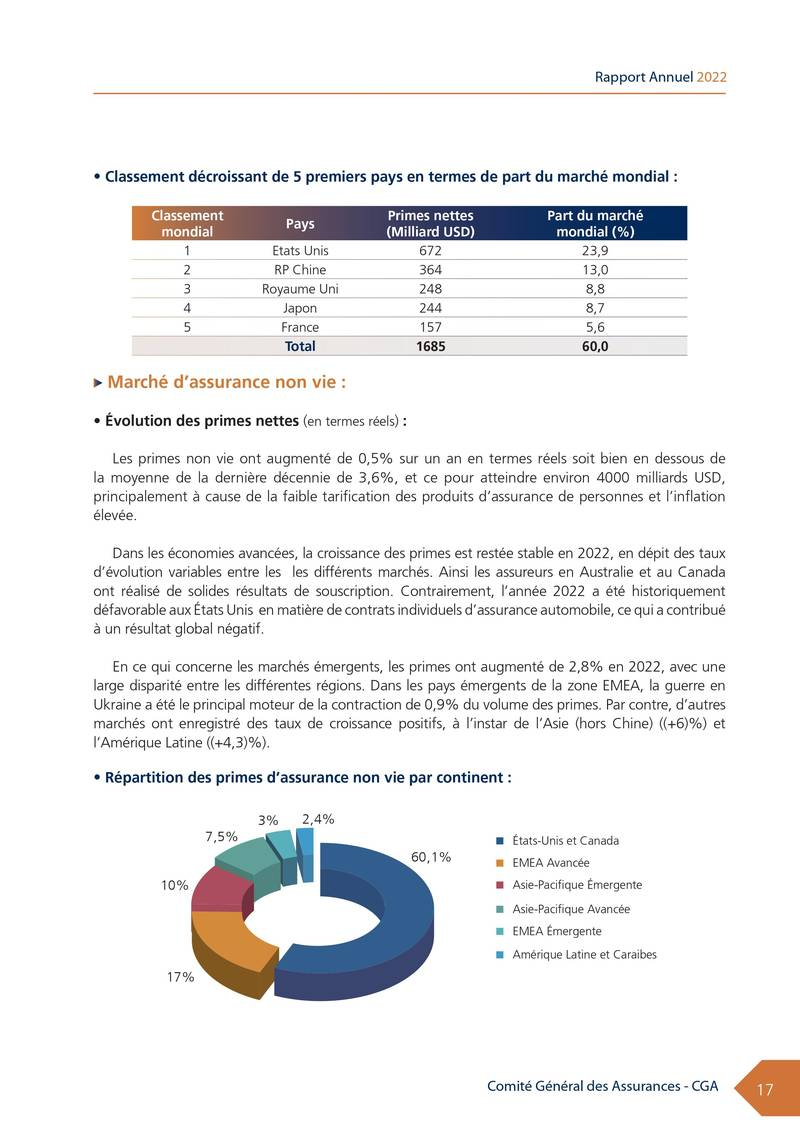

Rapport Annuel 2022

• Classement décroissant de 5 premiers pays en termes de part du marché mondial :

▶ Marché d’assurance non vie :

• Évolution des primes nettes (en termes réels) :

Les primes non vie ont augmenté de 0,5% sur un an en termes réels soit bien en dessous de la moyenne de la dernière décennie de 3,6%, et ce pour atteindre environ 4000 milliards USD, principalement à cause de la faible tarification des produits d’assurance de personnes et l’inflation élevée.

Dans les économies avancées, la croissance des primes est restée stable en 2022, en dépit des taux d’évolution variables entre les différents marchés. Ainsi les assureurs en Australie et au Canada ont réalisé de solides résultats de souscription. Contrairement, l’année 2022 a été historiquement défavorable aux États Unis en matière de contrats individuels d’assurance automobile, ce qui a contribué à un résultat global négatif.

En ce qui concerne les marchés émergents, les primes ont augmenté de 2,8% en 2022, avec

In [43]:
%%time

image_path = "cga_images/RAP_CGA_FR_ANG_2022-images-17.jpg"
result = ocr_page(image_path)
display_text_with_pdf_or_image_plain(
    raw_text=result, file_path=image_path
)